# Quantum Information with Julia

* <a href="#single_qubit"> The Single Qubit </a>

* <a href="#two_qubits"> Two Qubits </a>

* <a href="#measurements"> Measurements </a>

* <a href="#transformations"> Unitary Transformations </a>

* <a href="#bloch_sphere"> Bloch Sphere </a>

In [1]:
#import Pkg; Pkg.add("PyPlot")

In [2]:
# load functions used throughout the notebook
include("1_source/main.jl") ;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12796910030612903804\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5368470876958028455\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12796910030612903804\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

<a id="single_qubit"></a>

## The Single Qubit

Throughout we will use the bra-ket notation, the quantum information way of writing down vectors. Let's remember what the two vectors corresponding to the two classical bits 0 and 1 look like

$$\left| 0 \right\rangle = \begin{pmatrix}1 \\ 0\end{pmatrix}, 
\quad \text{and} \quad 
\left| 1 \right\rangle = \begin{pmatrix}0 \\ 1\end{pmatrix}$$

In [3]:
# The vector corresponding to |0>
v0 = [1; 0]

2-element Array{Int64,1}:
 1
 0

In [4]:
# The vector corresponding to |1>
v1 = [0; 1]

2-element Array{Int64,1}:
 0
 1

Accordingly, we can describe the state $\left| \psi \right\rangle$ of a qubit in general by

$$\left| \psi \right\rangle = \alpha \left| 0 \right\rangle + \beta \left| 1 \right\rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \:$$

The parameters $\alpha$ and $\beta$ are amplitudes. Let's try constructing such a vector for some values of $\alpha$ and $\beta$ in Julia

In [5]:
# Amplitudes
alpha = 1/sqrt(2);
beta = 1/sqrt(2);

# The qubit psi corresponding to such amplitudes
psi = alpha * v0 + beta * v1

2-element Array{Float64,1}:
 0.7071067811865475
 0.7071067811865475

<a id='normalization'></a>

### Normalization

Remember that for $\left| \psi \right\rangle$ to be a valid qubit we require $\left| \psi \right\rangle$ to be normalized. For the inner product of $\left| \psi \right\rangle$ with itself in bra-ket notation as $ \langle \psi \:|\: \psi \rangle$ must be

$$ \langle \psi \:|\: \psi \rangle = \lvert\alpha\rvert^2 + \lvert\beta\rvert^2 = 1$$

To make this more explicit recall that a bra $\left\langle \psi \right|$ denotes the complex conjugate of the ket $\left| \psi \right\rangle$:

$$\left\langle \psi \right|= \begin{pmatrix} \alpha \\ \beta \end{pmatrix}^{*T} = \begin{pmatrix} \alpha^* , \beta^* \end{pmatrix} \:$$ 

Let's expand this in terms of the vector: 

$$\langle \psi \:|\: \psi \rangle = \begin{pmatrix} \alpha^*\:, \beta^* \end{pmatrix} \cdot \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \alpha \cdot \alpha^* + \beta \cdot \beta^* = \lvert\alpha\rvert^2 + \lvert\beta\rvert^2 = 1$$

Let's check whether the qubit psi we have defined above is normalized

In [6]:
# In Julia, this gives us the bra of a vector. Let's print it
psi'

1×2 LinearAlgebra.Adjoint{Float64,Array{Float64,1}}:
 0.707107  0.707107

In [7]:
# Let's now check normalization!
psi'*psi

0.9999999999999998

Be careful that the bra is the <b>conjugate</b> transpose and not merely the transpose! To see this, let's construct a complex vector, where `im` is the Julia way of writing the complex $i$.

In [8]:
# Let's define a complex vector
alpha = 1/sqrt(2);
beta = im * 1/sqrt(2);

# Let's display the vector
psi = alpha * v0 + beta * v1

2-element Array{Complex{Float64},1}:
 0.7071067811865475 + 0.0im
                0.0 + 0.7071067811865475im

In [9]:
# And let's display it's bra: the complex conjugate
psi'

1×2 LinearAlgebra.Adjoint{Complex{Float64},Array{Complex{Float64},1}}:
 0.707107-0.0im  0.0-0.707107im

As an exercise for yourself, go and adapt the Julia code below to test whether $$|\Psi\rangle = \alpha |0\rangle + \beta |1\rangle$$ with $\alpha = 1/3$ and $\beta = 2/3$ is normalized

In [10]:
# First, let's define again the amplitudes
alpha = 1/sqrt(3);
beta = sqrt(2)/sqrt(3);

# Construct the vector psi
psi = alpha * v0 + beta * v1;

# Compute the inner product <psi|psi>
psi'*psi

1.0000000000000002

#### A real valued example

Remember that $\alpha$ and $\beta$ are in general complex numbers! Let us however assume here that $\alpha$ and $\beta$ have a real value</b>. The normalization condition thus becomes $\alpha^2 + \beta^2 = 1$

To visualize such a qubit, let us make the following parametrization 

$$\alpha = \cos\theta \quad \text{and} \quad \beta = \sin\theta$$

and see how the state vector can be represented in a 2D plot

$$\left| \psi(\theta) \right\rangle = \alpha \left| 0 \right\rangle + \beta \left| 1 \right\rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} \:$$

Varying $\theta$, you will see the state vector representation vary accordingly. As an exercise for yourself, go and investigate the angles for the elements $|0\rangle$ and $|1\rangle$ of the standard basis, and the vectors defining the Hadmard basis

$$|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

$$|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$

In [11]:
single_state_vector_plot()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 25,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
13, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7cf4566980, Task (runnable) @0x00007f7cf4566980), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-180\",\"-165\",\"-150\",\"-135\",\"-120\",\"-105\",\"-90\",\"-75\",\"-60\",\"-45\",\"-30\",\"-15\",\"0\",\"15\",\"30\",\"45\",\"60\",\"75\",\"90\",\"105\",\"120\",\"135\",\"150\",\"165\",\"180\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"5873887223024275524\",\"id\":\"120734

We have already seen above how to express $|+\rangle$ and $|-\rangle$ in terms of the standard Basis $|0\rangle$, $|1\rangle$ above. Since the Hadmard basis is also a basis, we should of course also be able to write $|0\rangle$ and $|1\rangle$ in terms of $|+\rangle$ and $|-\rangle$

We can find the coefficients $\alpha_0, \beta_0$ and $\alpha_1,\beta_1$

$$|0\rangle = \alpha_0 |+\rangle + \beta_0 |-\rangle$$
$$|1\rangle = \alpha_1 |+\rangle + \beta_1 |-\rangle$$

In [12]:
# Let's first define the plus and minus state
plus = 1/sqrt(2) * (v0 + v1);
minus = 1/sqrt(2) * (v0 - v1);

# Let's first make the v0 vector by combining plus and minus
alpha0 = 1/sqrt(2);
beta0 = 1/sqrt(2);
newV0 = alpha0 * plus + beta0 * minus

2-element Array{Float64,1}:
 0.9999999999999998
 0.0

In [13]:
# And then the new one vector
alpha1 = 1/sqrt(2);
beta1 = -1/sqrt(2);
newV1 = alpha1 * plus + beta1 * minus

2-element Array{Float64,1}:
 0.0
 0.9999999999999998

<h3 style="color:#00A6D6;">Exercise 1</h3>

Consider $$\left| b_0 \right\rangle = \sqrt{\frac{1}{3}} \left| 0 \right\rangle + \sqrt{\frac{2}{3}} \left| 1 \right\rangle$$

What real-valued vectors are orthogonal to this vector? In other words given $\left| b_0 \right\rangle$ which $\left| b_1 \right\rangle$ satisfy

$$ \left\langle b_1 | b_0 \right\rangle = 0 \:?$$

Your task is to find parameters $\alpha_1 \geq 0$ and $\beta_1$ such that

$$\left| b_1 \right\rangle = \begin{pmatrix} \alpha_1 \\ \beta_1 \end{pmatrix}$$

is orthogonal to $\left| b_0 \right\rangle$

In [14]:
# First let's define the vector b0. We'll do this directly as a vector now
b0 = [sqrt(1/3) ; sqrt(2/3)];

# Set the amplitudes for b1. We'll put some funny amplitudes to start with...
# Solution: alpha1 + beta1*sqrt(2) = 0 and alpha1^2 + beta1^2 = 1
alpha1 = sqrt(2/3);
beta1 = -sqrt(1/3);

b1 = [alpha1; beta1]

println("You have entered |b_1> = ")
println("$alpha1 |0> + $beta1 |1> \n")
println("The inner product is \n <b_0|b_1> = ", b0'*b1)

You have entered |b_1> = 
0.816496580927726 |0> + -0.5773502691896257 |1> 

The inner product is 
 <b_0|b_1> = 0.0


<h3 style="color:#00A6D6;">Exercise 2</h3>

Calculate the exact inner product of $$|+\rangle$$ and $$|0_y\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i |1\rangle)\:$$ 

In other words, calculate 

$$ \langle 0_y | + \rangle$$

<h4 style="color:#00A6D6;"> Supplement to Exercise 2</h4>

Below, you can enter the states $\lvert+\rangle$ and $|0_y\rangle$ in terms of coefficients $\alpha_1$, $\beta_1$ and $\alpha_2$, $\beta_2$

$$ \lvert+\rangle = \begin{pmatrix} \alpha_1 \\ \beta_1 \end{pmatrix} \quad \lvert0_y\rangle = \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix} $$ 

Note, in Julia, when it comes to complex numbers, one writes `im` instead of $i$. Thus $z = x + i \cdot y$ translates to Julia code `z = x + im*y`

In [15]:
# |+> state
α_1 = 1/sqrt(2)
β_1 = 1/sqrt(2)

plus = [α_1; β_1];

# |0>_y state
α_2 = 1/sqrt(2)
β_2 = im*sqrt(1/2)

y0 = [α_2; β_2];

# Compute the inner product - your code goes below!
println("The inner product is \n  <0_y|+> = ", y0'*plus)

The inner product is 
  <0_y|+> = 0.4999999999999999 - 0.5im


<a id="two_qubits"></a>

## Two Qubits

We can describe the state of two qubits by taking the tensor product

$$\left| \psi_1 \right\rangle \otimes \left| \psi_2 \right\rangle = \Big(\alpha_1 \left| 0 \right\rangle + \beta_1 \left| 1 \right\rangle \Big) \otimes \Big(\alpha_2 \left| 0 \right\rangle + \beta_2 \left| 1 \right\rangle \Big) =$$

$$= \begin{pmatrix} \alpha_1 \\ \beta_1 \end{pmatrix} \otimes \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix} = \begin{pmatrix} \alpha_1 \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix}  \\ \beta_1 \begin{pmatrix} \alpha_2 \\ \beta_2 \end{pmatrix}  \end{pmatrix} = \begin{pmatrix} \alpha_1 \cdot \alpha_2 \\ \alpha_1 \cdot \beta_2  \\  \beta_1 \cdot \alpha_2 \\ \beta_1 \cdot \beta_2 \end{pmatrix}  $$

To illustrate this, let us calculate the vector associated with $ \left| \psi_1 \right\rangle \otimes \left| \psi_2 \right\rangle$ given $\left| \psi_1 \right\rangle$ and $\left| \psi_2 \right\rangle$

In [16]:
# Let's first define the vectors, adapt the amplitudes to play around!

# Define Psi1
alpha1 = 1;
beta1 = 0;
psi1 = [alpha1; beta1];

# Define Psi2
alpha2 = 0;
beta2 = 1;
psi2 = [alpha2; beta2];

# Compute the tensor product
psiTwo = kron(psi1, psi2)

4-element Array{Int64,1}:
 0
 1
 0
 0

<h3 style="color:#00A6D6;">Exercise 3</h3>

Consider the following tensor product

$$ |0_y\rangle \otimes | + \rangle = \begin{pmatrix} c_1 \\ c_2 \\ c_3 \\ c_4 \end{pmatrix} $$

Calculate the coefficients $c_1$, $c_2$, $c_3$, $c_4$

Note, $|0\rangle_y$ has been defined in exercise 2.

<h4 style="color:#00A6D6;"> Supplement to Exercise 3 </h4>

Similar to the previous exercise you can check if your calculations went well using the code block just below. You can enter the states $|0_y\rangle$ and $|+\rangle$ numerically in terms of coefficients $\alpha_1$, $\beta_1$ and $\alpha_2$, $\beta_2$ and calculate the associated tensor product.

In [17]:
# |0_y> state
α_1 = 1/sqrt(2)
β_1 = im*sqrt(1/2)
y0 = [α_1; β_1];

# |+> state
α_2 = 1/sqrt(2)
β_2 = 1/sqrt(2)
z0 = [α_2; β_2];

kron(y0, z0)

4-element Array{Complex{Float64},1}:
 0.4999999999999999 + 0.0im
 0.4999999999999999 + 0.0im
                0.0 + 0.5im
                0.0 + 0.5im

<a id="measurements"></a>

## Measurements

Let's now measure some qubits! Chiefly, we will be measuring one -- or more -- qubits in a basis, where we will write the basis vectors as $|b_j\rangle$ for outcome $j$. The probability of obtaining a particular outcome is given by

$$P(B=j) = \lvert \langle \psi \:|\: b_j \rangle \rvert^2 $$

### Measuring a real-valued qubit

To gain some intuition, let us now again consider a qubit with real valued amplitudes. Remember, that we can parameterize such a qubit by an angle $\theta$

$$\left| \psi(\theta) \right\rangle = \cos\theta \left| 0 \right\rangle + \sin\theta \left| 1 \right\rangle = \begin{pmatrix} \cos\theta \\ \sin\theta \end{pmatrix} \:$$

Let's now assume the basis that we measure in is also real valued where the outcome $j=0$ corresponds to the vector 

$$\left| b_0 \right\rangle = \begin{pmatrix} \cos\gamma \\ \sin\gamma \end{pmatrix} \:$$

Let us visualize $\lvert \psi \rangle$ and $\lvert b_0 \rangle$ and calculate the corresponding $p_{b=0}$

You will see a sliders appear which lets you set $\theta$ and $\gamma$ (in degrees). A plot will appear of $\lvert \psi \rangle$ and $\lvert b_0 \rangle$ -- the solid part corresponds to the projection $ \big| \langle b_0 | \psi \rangle \big| \lvert b_0 \rangle$ -- with $P_{B=0}$ written in the title.

In [18]:
measurement_plot() # load the interactive plot.

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 25,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
13, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7cca2a4010, Task (runnable) @0x00007f7cca2a4010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-180\",\"-165\",\"-150\",\"-135\",\"-120\",\"-105\",\"-90\",\"-75\",\"-60\",\"-45\",\"-30\",\"-15\",\"0\",\"15\",\"30\",\"45\",\"60\",\"75\",\"90\",\"105\",\"120\",\"135\",\"150\",\"165\",\"180\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"5650325801724314987\",\"id\":\"753914

### Global phase is irrelevant

Is there a difference between the qubit $|\psi\rangle$ and $|\phi\rangle = e^{i\gamma} |\psi\rangle$ for some angle $\gamma \in \mathbb{R}$? It turns out that such a global phase $e^{i\gamma}$ is irrelevant: there is no measurement that will give us any information on such a global phase - or, in other words - a global phase leads to no observable differences.

Let's try and convince ourselves below by means of some examples, by measuring a qubit, and the one with the global phase in the standard basis. Of course, you may wish to measure in other bases as well.

In [19]:
# Basis to measure in - default is the standard basis
b0 = [1; 0];
b1 = [0; 1];

# State to be measured - default is the plus state
psi = [1; 1]/sqrt(2);

# Set the global phase
gamma = 0.1;
phi = exp(im * gamma) * psi

2-element Array{Complex{Float64},1}:
 0.7035741925769523 + 0.07059288589999414im
 0.7035741925769523 + 0.07059288589999414im

In [20]:
# Compute the outcome probabilities
val = b0'*psi

0.7071067811865475

In [21]:
p0 = abs(val[1])^2;    

val = b0'*phi;
p0Phase = abs(val[1])^2;

# Round and print
p0 = round(p0, digits=3);
p0Phase = round(p0Phase, digits=3);

println("Without phase: p0 = ", p0, "\n")
println("With phase: p0Phase = ", p0Phase)

Without phase: p0 = 0.5

With phase: p0Phase = 0.5


<h3 style="color:#00A6D6;">Exercise 4 </h3>

Consider the measurement basis 

$$ \{ \left| b_0 \right\rangle , \left| b_1 \right\rangle \} $$

with

$$ \left| b_0 \right\rangle = \sqrt{\frac{1}{3}} \left| 0 \right\rangle + \sqrt{\frac{2}{3}} \left| 1 \right\rangle$$

and 

$$\left| b_1 \right\rangle = \sqrt{\frac{2}{3}} \left| 0 \right\rangle - \sqrt{\frac{1}{3}} \left| 1 \right\rangle$$

For different states $ | \psi \rangle$ calculate probabilities of obtaining measurement outcomes 0 and 1. That is, compute the exact probabilities

$$ P(B=0) = p_0 = |\langle b_0 | \psi \rangle|^2 $$

and 

$$ P(B=1) =  p_1 = |\langle b_1 | \psi \rangle|^2 \:$$

for each of the following states

$$ |\psi_1 \rangle = |0\rangle$$

$$ |\psi_2 \rangle = |+\rangle$$

$$ |\psi_3 \rangle = |-\rangle$$

In [22]:
# This is the basis we will measure in
b0 = [1/sqrt(3); sqrt(2/3)];
b1 = [sqrt(2/3); -1/sqrt(3)];

# Define the states
psi1 = [1; 0]; # write down the state vector for |0>
psi2 = [1/sqrt(2); 1/sqrt(2)]; # write down the state vector for |+>
psi3 = [1/sqrt(2); -1/sqrt(2)]; # write down the state vector for |->

# probabilities
println("p0 GivenPsi1 = ", abs(b0'*psi1)^2)
println("p1 GivenPsi1 = ", abs(b1'*psi1)^2, "\n")

println("p0 GivenPsi2 = ", abs(b0'*psi2)^2) # 1+sqrt(2)/3 -1/2
println("p1 GivenPsi2 = ", abs(b1'*psi2)^2, "\n") # -sqrt(2)/3 +1/2

println("p0 GivenPsi3 = ", abs(b0'*psi3)^2) # -sqrt(2)/3 +1/2
println("p1 GivenPsi3 = ", abs(b1'*psi3)^2) # 1+sqrt(2)/3 -1/2

p0 GivenPsi1 = 0.3333333333333334
p1 GivenPsi1 = 0.6666666666666666

p0 GivenPsi2 = 0.9714045207910316
p1 GivenPsi2 = 0.028595479208968305

p0 GivenPsi3 = 0.028595479208968305
p1 GivenPsi3 = 0.9714045207910316


It is helpful to visualize the measurement. You will see a 2D plot of $\left| b_0 \right\rangle$ and $\left| b_1 \right\rangle$ appear. 

Furthermore a slider labeled $\theta$ will appear which allows you to select $|\psi \rangle = |0\rangle$, $|\psi \rangle = |+\rangle$ or $|\psi \rangle = |-\rangle$

Accordingly $|\psi \rangle$ is plot together with a numerical approximation of 

$$ p_0 = |\langle b_0 | \psi \rangle|^2$$

and 

$$ p_1 = |\langle b_1 | \psi \rangle|^2 \:$$



In [23]:
projective_measurement_plot()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["state"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol,Any}(:attributes => ("data-bind" => "foreach : options_js"),:className => "buttons has-addons is-centered"))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol,Any}())], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js" => (Observable{Any} with 1 listeners. Value:
OrderedDict[OrderedDict{String,Any}("key" => "0","val" => 1,"id" => "idRdx8Mwj3"), OrderedDict{String,Any}("key" => "+","val" => 2,"id" => "idfbYloAxN"), OrderedDict{String,Any}("key" => "-","val" => 3,"id" => "id54Hhrk6P")], nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7cf3302710, Task (runnable) @0x00007f7cf3302710), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n  

### Measuring two qubits

Let's now imagine we have two qubits A and B. We will imagine that Alice holds qubit A and Bob holds qubit B. Evidently we might imagine that Alice measures her qubit in a basis... and also Bob could measure his qubit in a basis. What can we say about the overall measurement? 

Let's consider the example where Alice measures in the in the standard basis

$$ |0\rangle_A = |0\rangle \\ |1\rangle_A = |1\rangle$$

and Bob measures in in a "$\pi/8$ rotated" basis:

$$ |0_L\rangle_B = cos \frac{\pi}{8} |0\rangle + sin\frac{\pi}{8} |1\rangle \\ |1_L\rangle_B = -sin\frac{\pi}{8} |0\rangle + cos \frac{\pi}{8} |1\rangle$$

To see how this is a "$\pi/8$ rotated" basis consider the following picture, where we will actually plot the basis of Alice and Bob into the same plot even though they are of course on two different qubits.

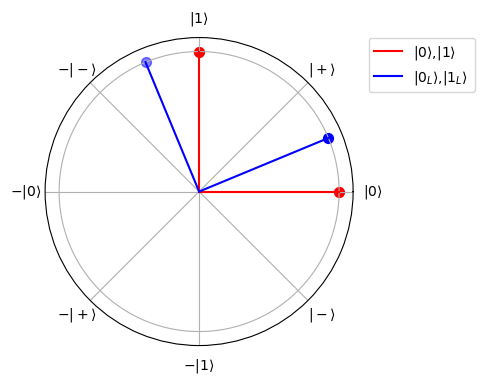

PyObject <matplotlib.legend.Legend object at 0x7f7cce4cfbd0>

In [24]:
pi8_rotated_basis_plot()

<h3 style="color:#00A6D6;">Exercise 5 </h3>

How can we describe the overall measurement if Alice measures in the basis $\{|0\rangle_A, |1\rangle_A\}$ and Bob - as defined just above - measures in the basis $\{|0_L\rangle_B,|1_L\rangle_B\}$  ?

Clearly we expect the overall measurement to have 4 outcomes, 0 or 1 for Alice, as well as 0 and 1 for Bob. This is indeed the case, and we can compute the outcome probabilities by taking the basis for Alice and the one for Bob, and constructing the basis for both qubits together. This can be done using the tensor product. Find the <b> measurement basis for A and B combined_L</b>

1. $|0\rangle_A \otimes |0_L\rangle_B$
2. $|0\rangle_A \otimes |1_L\rangle_B$
3. $|1\rangle_A \otimes |0_L\rangle_B$
4. $|1\rangle_A \otimes |1_L\rangle_B$

For clarity we have filled in the first coefficient for the first listed tensor product:

1. $|0\rangle_A \otimes |0_L\rangle_B = \begin{pmatrix} cos(\frac{\pi}{8}) \\ ? \\ ? \\ ? \end{pmatrix}$

Find such exact vector representations for the tensor products (1.), (2.), (3.) and (4.)

In [25]:
# lice's basis.
alice0 = [1; 0];
alice1 = [0; 1];

# Bob's basis.
bob0 = [cos(pi/8); sin(pi/8)];
bob1 = [-sin(pi/8); cos(pi/8)];

cb_1 = kron(alice0, bob0)
cb_2 = kron(alice0, bob1)
cb_3 = kron(alice1, bob0)
cb_4 = kron(alice1, bob1)

println("combined basis (1.): $cb_1^T \n") # [cos(pi/8), sin(pi/8), 0, 0]
println("combined basis (2.): $cb_2^T \n")
println("combined basis (3.): $cb_3^T \n")
println("combined basis (4.): $cb_4^T")

combined basis (1.): [0.9238795325112867, 0.3826834323650898, 0.0, 0.0]^T 

combined basis (2.): [-0.3826834323650898, 0.9238795325112867, -0.0, 0.0]^T 

combined basis (3.): [0.0, 0.0, 0.9238795325112867, 0.3826834323650898]^T 

combined basis (4.): [-0.0, 0.0, -0.3826834323650898, 0.9238795325112867]^T


<h3 style="color:#00A6D6;">Exercise 6 </h3>

Suppose now that Alice and Bob measure in the basis we constructed above. And let's suppose they measure the EPR pair 

$$ | \Phi \rangle = \frac{ |0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle}{\sqrt{2}} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \\ 0 \\ 1\end{pmatrix}\:$$

What are the probabilities 

$$ p_{xy} = \Big|\big( \langle x \rvert_A \otimes \langle y_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$$

of Alice getting outcome $x \in \{0,1\}$ and Bob outcome $y \in \{0,1\}$ rounded to 3 digits ?

In other words, what are 

1. $ p_{00} = \Big|\big( \langle 0\rvert_A \otimes \langle 0_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$
2. $ p_{01} = \Big|\big( \langle 0\rvert_A \otimes \langle 1_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$
3. $ p_{10} = \Big|\big( \langle 1\rvert_A \otimes \langle 0_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$
4. $ p_{11} = \Big|\big( \langle 1\rvert_A \otimes \langle 1_L \rvert_B \big) \cdot | \Phi \rangle \Big|^2$

rounded to 3 digits?

In [26]:
# Then let us define the state to be measured

Phi = [1; 0; 0; 1]/sqrt(2);

# The probabilities follow from the squared inner product
# betweeh Phi and the measurement basis 
p_00 = abs(Phi'*cb_1).^2
p_01 = abs(Phi'*cb_2).^2
p_10 = abs(Phi'*cb_3).^2
p_11 = abs(Phi'*cb_4).^2

# We will round the probabilities to 3 digits
p_00 = round(p_00, digits=3)
p_01 = round(p_01, digits=3)
p_10 = round(p_10, digits=3)
p_11 = round(p_11, digits=3)

println("p_00: $p_00")
println("p_01: $p_01")
println("p_10: $p_10")
println("p_11: $p_11")

p_00: 0.427
p_01: 0.073
p_10: 0.073
p_11: 0.427


<a id="transformations"></a>

## Unitary Transformations

Transformations on qubits are given by unitary transformations. Let's investigate such transformations in detail. 

As a warmup let's just define a matrix, the Hadamard transform, and verify that its indeed a unitary

$$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$


In [27]:
H = [1 1;1 -1]/sqrt(2);

# Let's now check whether the transformation is unitary by computing U' * U
U = H;
U' * U == U * U'

true

The Pauli matrices: X, Z and Y as defined below are also unitary

In [28]:
pX = [0 1; 1 0]; # Pauli X
pZ = [1 0; 0 -1]; # Pauli Z
pY = im * pX * pZ; # Pauli Y

Let us vizualize the effect of a unitary transformation $U$ on $\lvert \psi \rangle$. What does $U|\psi\rangle$ look like?

$$\lvert \psi(\theta) \rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \cos\theta \\ \sin{\theta} \end{pmatrix} $$

You will see a slider appear which lets you pick $\theta$. The state vector $\lvert \psi(\theta) \rangle$ is plotted accordingly.

Click the check-box to apply the unitary transformation (by default the Hadmard transformation) to $\lvert \psi(\theta) \rangle$ and you will see the resulting state vector $U \lvert \psi(\theta) \rangle$ plotted as well. Vary $\theta$ to see how $U \lvert \psi(\theta) \rangle$ and $\lvert \psi(\theta) \rangle$ change accordingly.

In [29]:
U = H 
# You could also input other real-valued unitaries, for example pX or pZ. 
unitary_transform_plot(U)   

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 25,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
13, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7cca2a6230, Task (runnable) @0x00007f7cca2a6230), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-180\",\"-165\",\"-150\",\"-135\",\"-120\",\"-105\",\"-90\",\"-75\",\"-60\",\"-45\",\"-30\",\"-15\",\"0\",\"15\",\"30\",\"45\",\"60\",\"75\",\"90\",\"105\",\"120\",\"135\",\"150\",\"165\",\"180\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"3739355212805501287\",\"id\":\"809042

<h3 style="color:#00A6D6;">Exercise 7</h3>

Let's imagine that Alice wants to send a bit $x \in \{0,1\}$ to Bob. Having gone all quantum, however, Alice has lost all means for classical communication. Unfortunately, Alice and Bob also have quite funny quantum devices.

Concretely, Alice has a device that can only prepare the state $|+\rangle$. Thankfully, however, she can apply one of two unitaries $U_0$ and $U_1$ of her choosing transforming her state to $|\psi_x\rangle = U_x |+\rangle$. To be fair, we at least allow Alice some control over her circuit so that Alice can decide to apply $U_x$ depending on her input bit $x\in\{0,1\}$. 

<img src="source/figure_exercise_7.svg">

Alice can now send her state $|\psi_x \rangle$ to Bob. Bob can only measure in the standard basis, and will take his measurement outcome $b \in \{0,1\}$ to be the value of $x$. 

Your goal in this exercise is to come up with a protocol so that Alice can communicate $x$ to Bob, no matter whether $x=0$ or $x=1$. Concretely, your goal is to determine what transformations $U_0$ and $U_1$ she applies for the cases $x=0$, and $x=1$. 

In other words we ask you to find two unitaries $ U_0$ and $U_1$ that Alice can apply such that the probability that Bob obtains measurement outcome $B=x$ is given by

$$ P(B=x) = \big| \langle x \: \lvert \: U_x \: \rvert \: + \rangle \big|^2 = 1 $$

You can check if you have found two such unitaries by making use of the code block just below. Enter $U_0$ and $U_1$ as is described and you will see the associated $p_0$ and $p_1$.

In [30]:
## enter values for U_0 and U_1
U_0 = H;
U_1 = H*pZ;

# Let's define the standard basis and the plus state
v0 = [1; 0];
v1 = [0; 1];
plus = [1; 1]/sqrt(2);

## let's compute the outcome probabilities if Alice applies U_0

# first, let's compute the output vector by applying the unitary transformation
outVec = U_0 * plus;

# then the probability that Bob measures b = 0 is given by the absolute inner product squared:
val = v0'*outVec;    
p_0 = abs(val[1])^2; # take the square of the absolute value.

# same for outcome b = 1
val = v1'*outVec;
p_1 = abs(val[1])^2;

# for printing, let's round the outcomes
p_0 = round(p_0, digits=3);
p_1 = round(p_1, digits=3);

println("You entered U_0 = ", U_0)
println("For this case the probability of Bob's measurement outcomes are:")
println("p_0 = $p_0")
println("p_1 = $p_1 \n")

## let's compute the outcome probabilities if Alice applies U_1

# first, let's compute the output vector
outVec = U_1 * plus;

# then the probability that Bob measures b = 0
val = v0'*outVec;
p_0 = abs(val[1])^2;

# the probability that Bob measures b = 1
val = v1'*outVec;
p_1 = abs(val[1])^2;

# for printing, let's round the outcomes
p_0 = round(p_0, digits=3);
p_1 = round(p_1, digits=3);

println("You entered U_1 = ", U_1)
println("For this case the probability of Bob's measurement outcomes are:")
println("p_0 = $p_0")
println("p_1 = $p_1 \n")


You entered U_0 = [0.7071067811865475 0.7071067811865475; 0.7071067811865475 -0.7071067811865475]
For this case the probability of Bob's measurement outcomes are:
p_0 = 1.0
p_1 = 0.0 

You entered U_1 = [0.7071067811865475 -0.7071067811865475; 0.7071067811865475 0.7071067811865475]
For this case the probability of Bob's measurement outcomes are:
p_0 = 0.0
p_1 = 1.0 



<a id="bloch_sphere"></a>

## Bloch Sphere

We can represent a qubit in differents forms, namely in terms of the Bloch sphere. It is important to understand that this representation is fundamentally distinct from the 2 dimensional vectors we saw above. In this way qubits are parameterized by angles $\theta$ and $\phi$ in the Bloch sphere representation. Be careful to note that we will use $\theta/2$ here, since we will draw in a very different space in 3D than the one in the plots above.

$$\left| \psi \right\rangle = cos \frac{\theta}{2} \: \left| 0 \right\rangle + e^{i \cdot \phi} sin \frac{\theta}{2} \: \left| 1 \right\rangle = \begin{pmatrix} cos \frac{\theta}{2} \\ e^{i \cdot \phi} sin \frac{\theta}{2} \end{pmatrix}$$

Let us now see how the qubits Bloch sphere representation follows from $\theta$ and $\phi$. Explore where the state lies in terms of the angles in the animation below.

In [31]:
f1 = figure(figsize=(8, 8))

@manipulate for view=[15, 60, -30], θ in 0:30:180, ϕ in -180:30:180
    b1 = Bloch()
    add_vector(b1, [θ, ϕ])
    withfig(f1) do
        render(b1, view)
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 3,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7cf3302230, Task (runnable) @0x00007f7cf3302230), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"15\",\"60\",\"-30\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"6277953127164594541\",\"id\":\"6357511239801061694\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"6277953127164594541\",\"id\":\"17737358695244758491\",\"type\":\"observable\"}

It is instructive to see what happens if we transform a vector on the Bloch sphere with a unitary. As an example let's consider the following state

$$ \lvert \psi \rangle = \cos\frac{\pi}{8} \cdot \lvert 0 \rangle + \sin\frac{\pi}{8} \cdot \lvert 1 \rangle = \frac{ \sqrt{2 + \sqrt{2} }}{2} \lvert 0 \rangle + \frac{ \sqrt{2 - \sqrt{2} }}{2}  \vert 1 \rangle $$

We'll find the following images

1. $ X \lvert \psi \rangle $
2. $ Y \lvert \psi \rangle $
3. $ Z \lvert \psi \rangle $
4. $ H \lvert \psi \rangle $

By running the code cell below you can see these states represented on the Bloch sphere.

In [32]:
α = 0.5 * sqrt(2 + sqrt(2))
β = 0.5 * sqrt(2 - sqrt(2))
ket = [α; β];

pX = [0 1; 1 0]
pY = [0 -im; im 0]
pZ = [1 0; 0 -1]
H = [1 1; 1 -1]/sqrt(2)

v0 = ket_to_bloch(ket)      
v1 = ket_to_bloch(pX * ket)    
v2 = ket_to_bloch(pY * ket)    
v3 = ket_to_bloch(pZ * ket)    
v4 = ket_to_bloch(H * ket)    

# let us define a "dictionary": "I" belongs to v0, "X" belongs to v1, etc.
vDict = Dict("I" => v0,
             "X" => v1,
             "Y" => v2,
             "Z" => v3,
             "H" => v4) 
# Now vDict["X"] returns the vector v1.
#     vDict["H"] returns the vector v4.

f9 = figure(figsize=(8, 8)) 

@manipulate for view in [15, -30, 60], transform in ["I", "X", "Y", "Z", "H"]
    withfig(f9) do
        b9 = Bloch()
        add_vector(b9, v0)
        add_vector(b9, vDict[transform])
        render(b9,view)
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 3,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7cca939390, Task (runnable) @0x00007f7cca939390), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"15\",\"-30\",\"60\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"10845338881001106520\",\"id\":\"15645569909395296899\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"10845338881001106520\",\"id\":\"2139919844969063311\",\"type\":\"observable\

<h3 style="color:#00A6D6;">Exercise 8 </h3>

To become more familiar with the Bloch sphere, we ask you to find angles $\theta$ and $\phi$ (in radians) with 

$$ | \psi \rangle = cos \frac{\theta}{2} \: | 0 \rangle + e^{i \cdot \phi} sin \frac{\theta}{2} \: | 1 \rangle = \begin{pmatrix} cos \frac{\theta}{2} \\ e^{i \cdot \phi} sin \frac{\theta}{2} \end{pmatrix}$$

for the following states

1. $|\psi \rangle = |+\rangle$
2. $|\psi \rangle = \frac{\sqrt{3}}{2}|0\rangle + \frac{i}{2} |1\rangle $

<b style="color:#00A6D6;">Example </b>

To help you get started let us give one example. Let us find $\theta$ and $\phi$ associated with

$$|\psi \rangle = |0\rangle\:$$

We are looking for $\theta$, $\phi$ such that

$$|0\rangle = cos \frac{\theta}{2} \: | 0 \rangle + e^{i \cdot \phi} sin \frac{\theta}{2} \: | 1 \rangle $$

Thus $$\alpha = cos \frac{\theta}{2} = 1 $$ and $$\beta = e^{i \cdot \phi} sin \frac{\theta}{2} = 0 \:$$ 

We find as a solution $\theta = 0$ ( $\theta = k \cdot 2\pi$, $k$ integer ) with $\phi$ irrelevant.

In [33]:
# |+>:  theta=90 phi=0
theta_plus = 2 * acosd(1/sqrt(2))
phi_plus = log((1/sind(theta_plus/2)) * (1/sqrt(2)))
println("theta_plus = $theta_plus")
println("theta_psi = $psi_plus \n")

# |psi>: Euler exp(i*phi) = cos(phi) +isin(phi)
theta_psi = 2 * acosd(sqrt(3)/2)
phi_psi = real((1/sind(theta_plus/2)) * (im/2))
println("theta_psi = $theta_psi")
println("theta_psi = ", acosd(phi_psi))

theta_plus = 90.00000000000001


LoadError: UndefVarError: psi_plus not defined

<h4 style="color:#00A6D6;"> Supplement to Exercise 8</h4>

The following code can be used to vizualize the state on the Bloch sphere. Simply enter values for $\theta$ and $\phi$. To plot a state on the Bloch sphere we should determine the associated Bloch vector $v$ (a Cartesian vector):

$$v = \begin{pmatrix} v_x \\ v_y \\ v_z \end{pmatrix} \:$$
 
It turns out that $\theta$ and $\phi$ -- as introduced just now -- are the spherical coordinates associated with $v$. When it comes to the radial coordinate $r$, it turns out that $r=1$. This follows from $\langle \psi | \psi \rangle = 1$. Translating from spherical to Cartesian coordinates we recover

$$ v = \begin{pmatrix} \sin\theta \cdot cos\phi \\ \sin\theta \cdot sin\phi \\ \cos\theta \end{pmatrix} $$ 


In [34]:
theta = 60 # degrees
phi = 90    # degrees

bloch_vector = [sind(theta)*cosd(phi); sind(theta)*sind(phi); cosd(theta)]

f8 = figure(figsize=(8, 8))

@manipulate for view in [15, -30, 60]
    withfig(f8) do
        b8 = Bloch()
        add_element(b8, bloch_vector)
        render(b8, view)
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 3,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/opt/julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/all.js"), Asset("css", nothing, "/opt/julia/packages/InteractBase/sOe2Z/src/../assets/style.css"), Asset("css", nothing, "/opt/julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set{AbstractConnection}(), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f7ccabd6bf0, Task (runnable) @0x00007f7ccabd6bf0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"15\",\"-30\",\"60\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"103565721641850041\",\"id\":\"17903085823050965877\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"103565721641850041\",\"id\":\"14788669129620959219\",\"type\":\"observable\"})